Financial loan services are leveraged by companies 
across many industries, from big banks to financial 
institutions to government loans. One of the primary 
objectives of companies with financial loan services is 
to decrease payment defaults and ensure that 
individuals are paying back their loans as expected. 
In order to do this efficiently and systematically, 
many companies employ machine learning to predict which 
individuals are at the highest risk of defaulting on their 
loans, so that proper interventions can be effectively deployed to the right audience


## Predict helps banks minimize loan risks  (Default = 1,Risky Borowwer ) or not (Default = 0,Safe borrower).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
df=pd.read_csv("Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop("LoanID",axis=1,inplace=True)

## EDA Vizulization

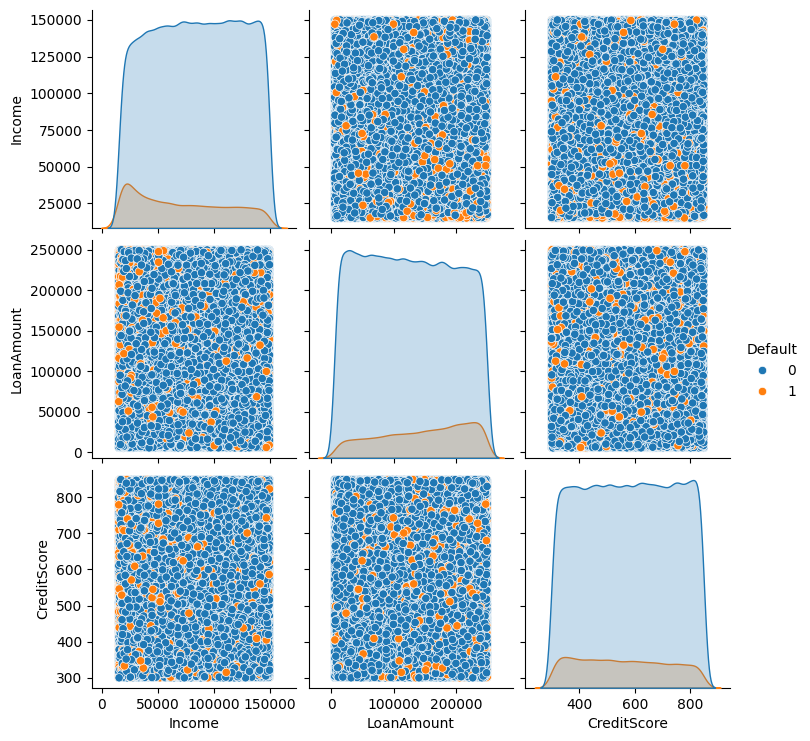

In [11]:
sns.pairplot(df[['Income', 'LoanAmount', 'CreditScore', 'Default']], hue='Default')
plt.show()

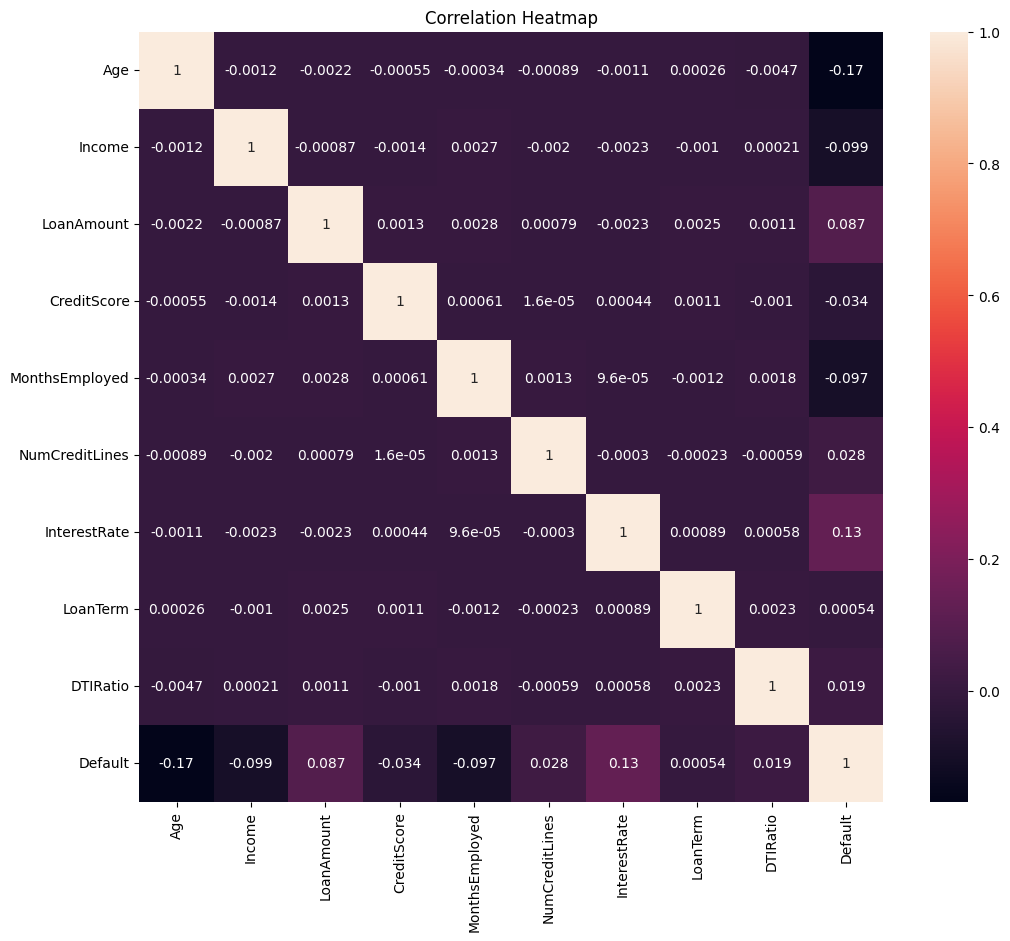

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

we show in pair plot in density seperable,acrosss the space and heatmap weak liner
relationship(near 0)

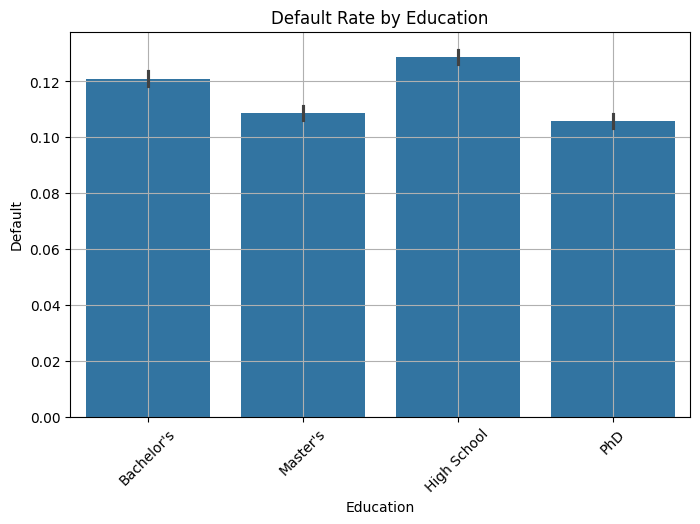

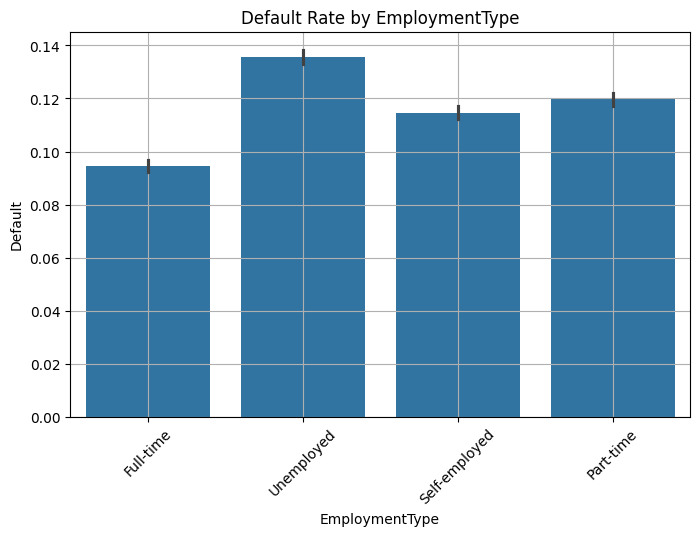

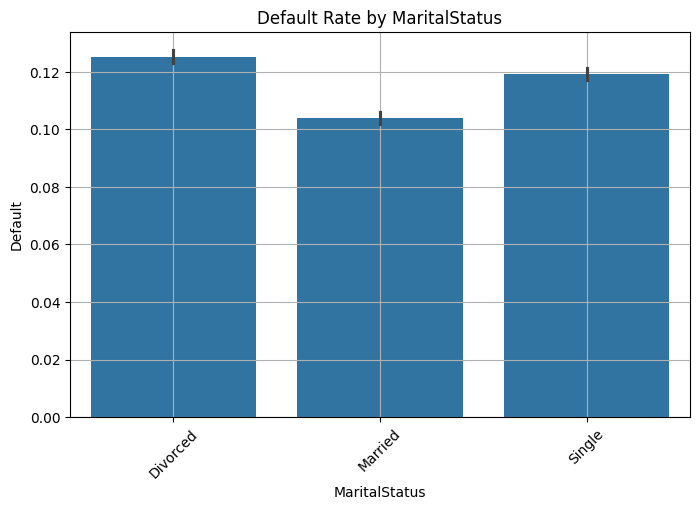

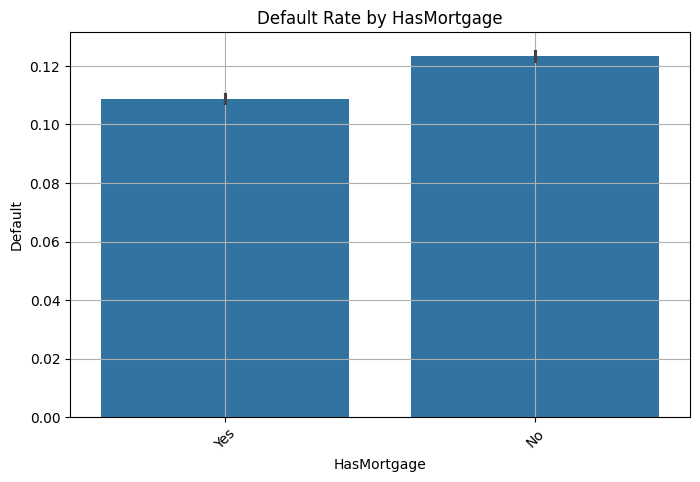

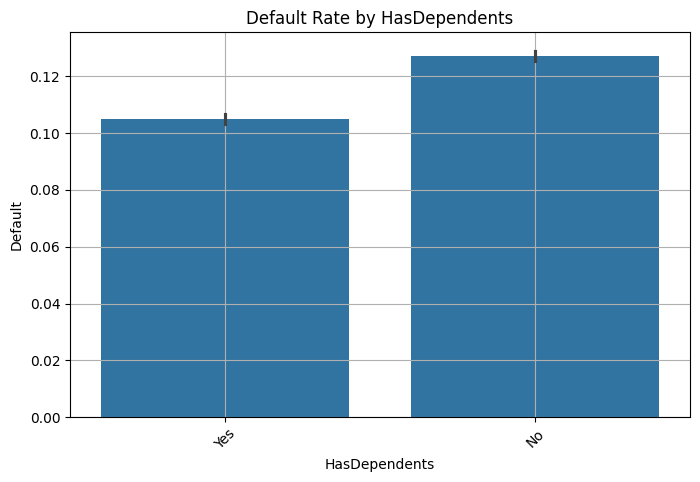

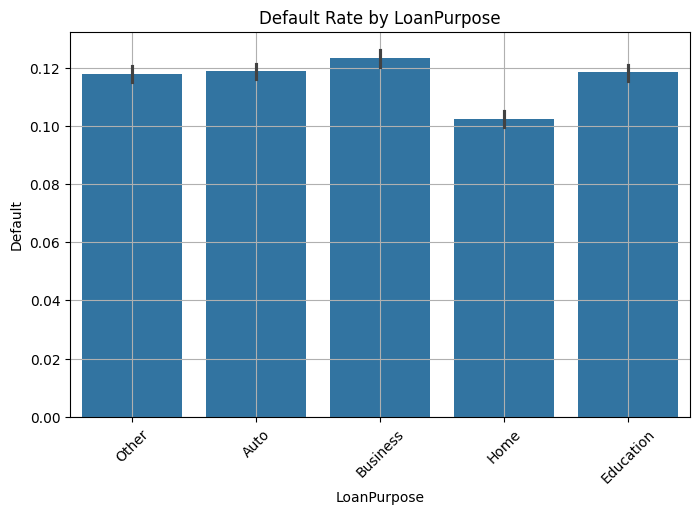

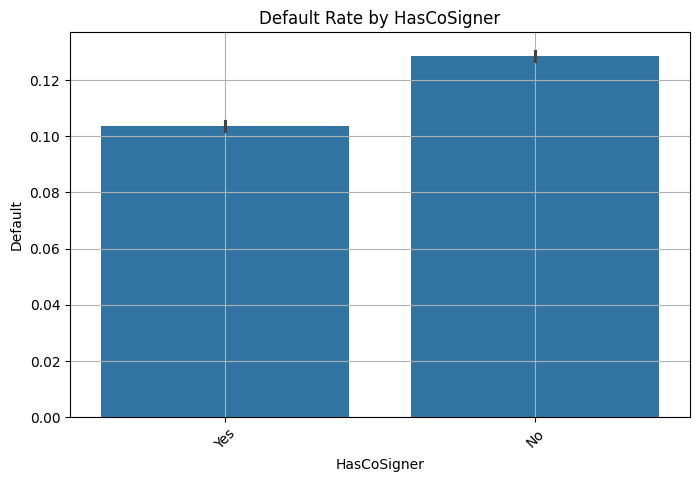

In [14]:
data = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 
                        'LoanPurpose', 'HasCoSigner']

#use visualization for count
for col in data:
    plt.figure(figsize=(8, 5)) #size of figure
    sns.barplot(data=df, x=col, y='Default')
    plt.title(f'Default Rate by {col}')
    plt.xticks(rotation=45)#on x-axis rotate name
    plt.grid(True) #add grid
    # Display the plot
    plt.show()
    

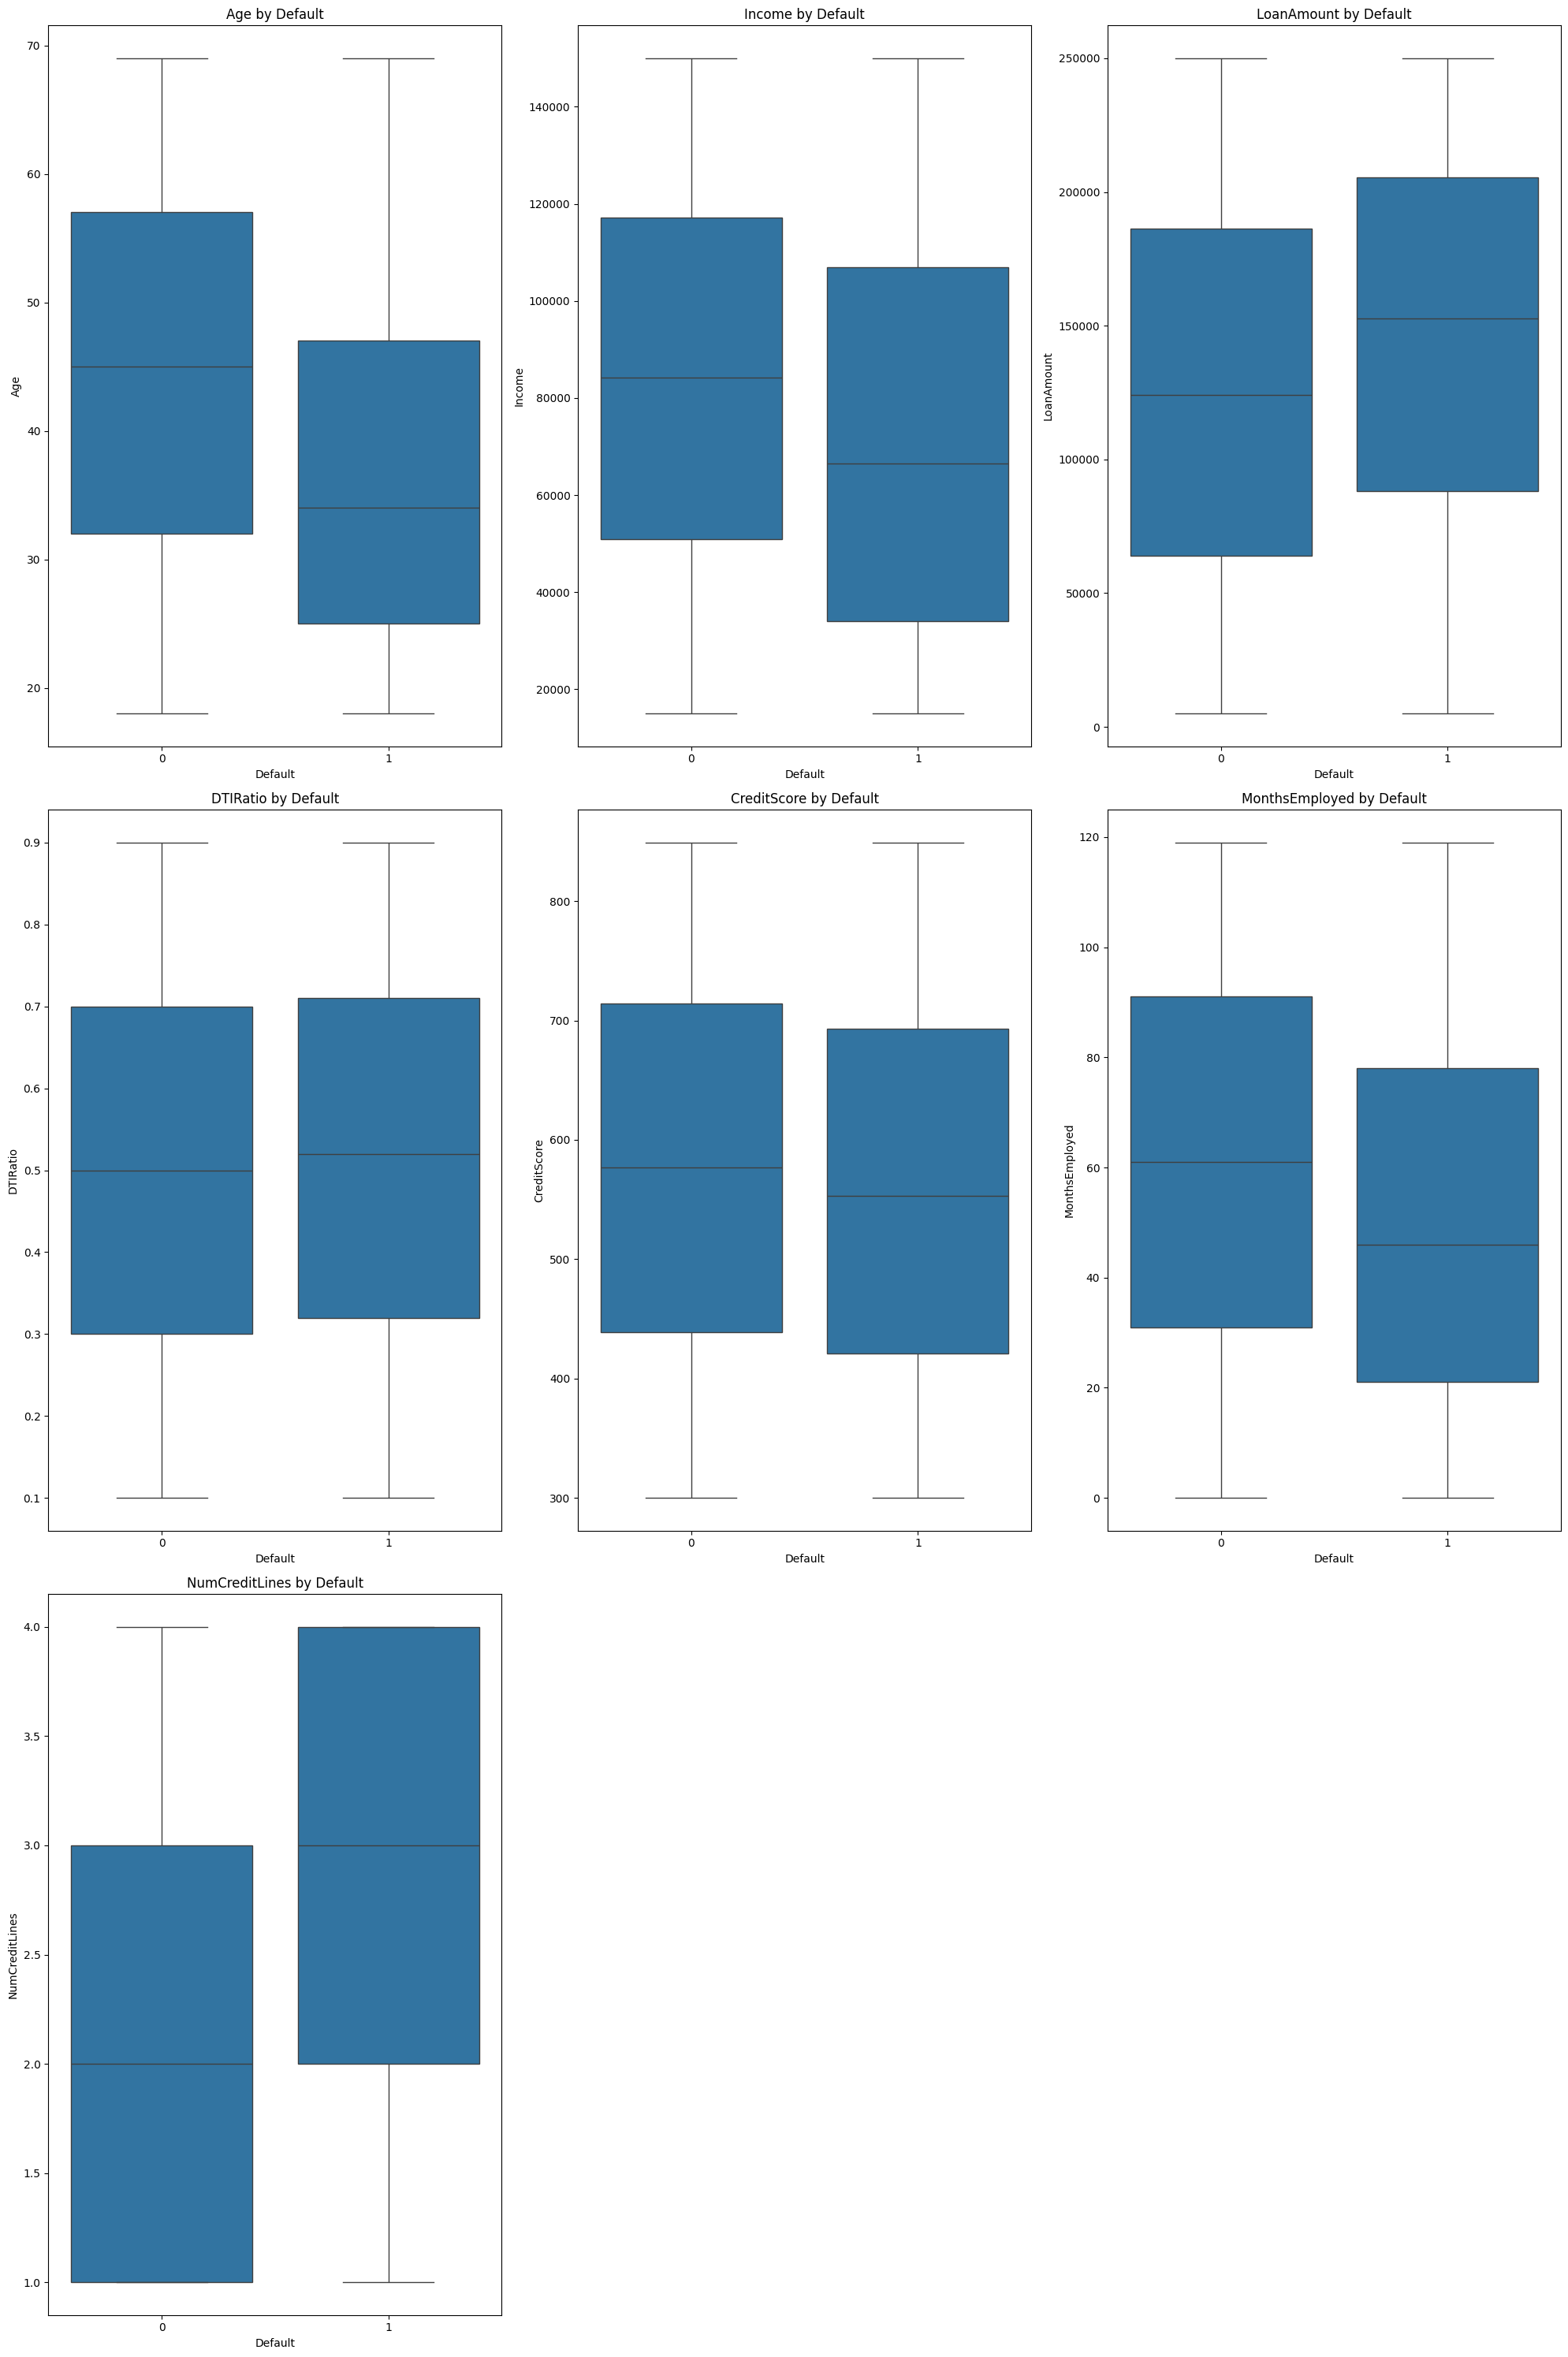

In [15]:
numeric= ['Age', 'Income', 'LoanAmount', 'DTIRatio', 'CreditScore',
                'MonthsEmployed', 'NumCreditLines']

plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric,1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Default', y=col, data=df)
    plt.title(f'{col} by Default')
plt.tight_layout()
plt.show()


do not have outliers show

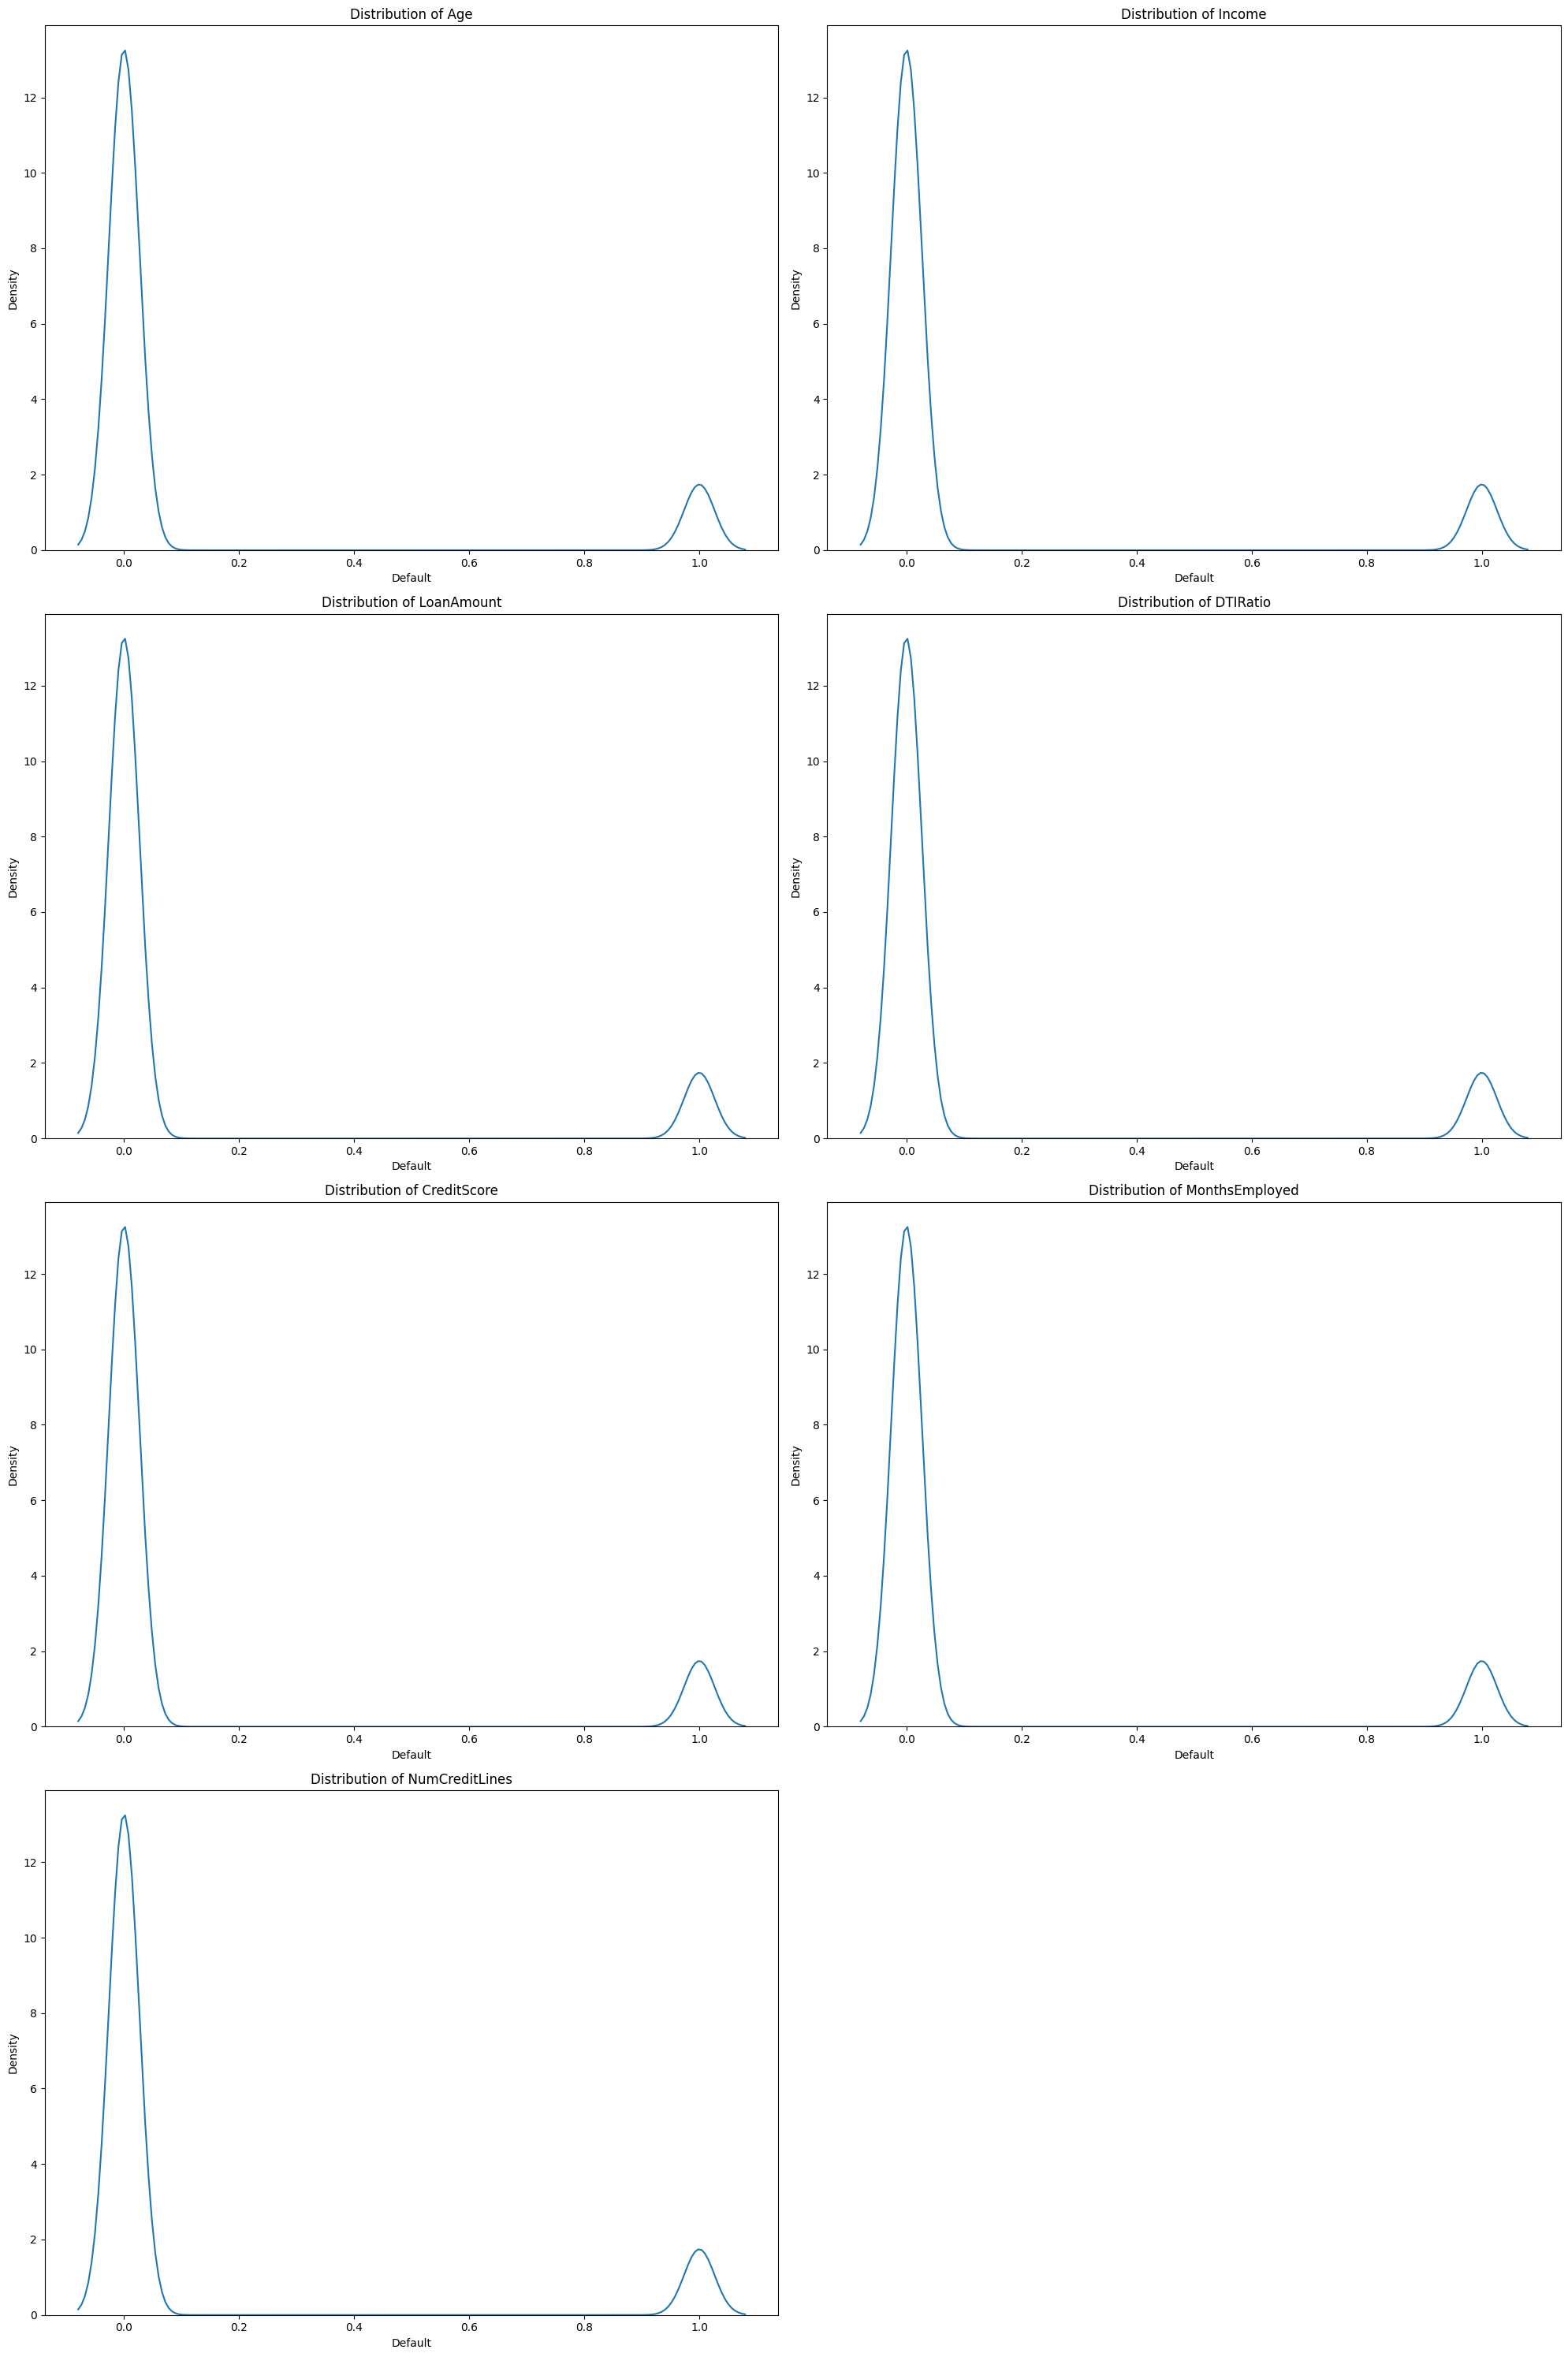

In [17]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x='Default')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

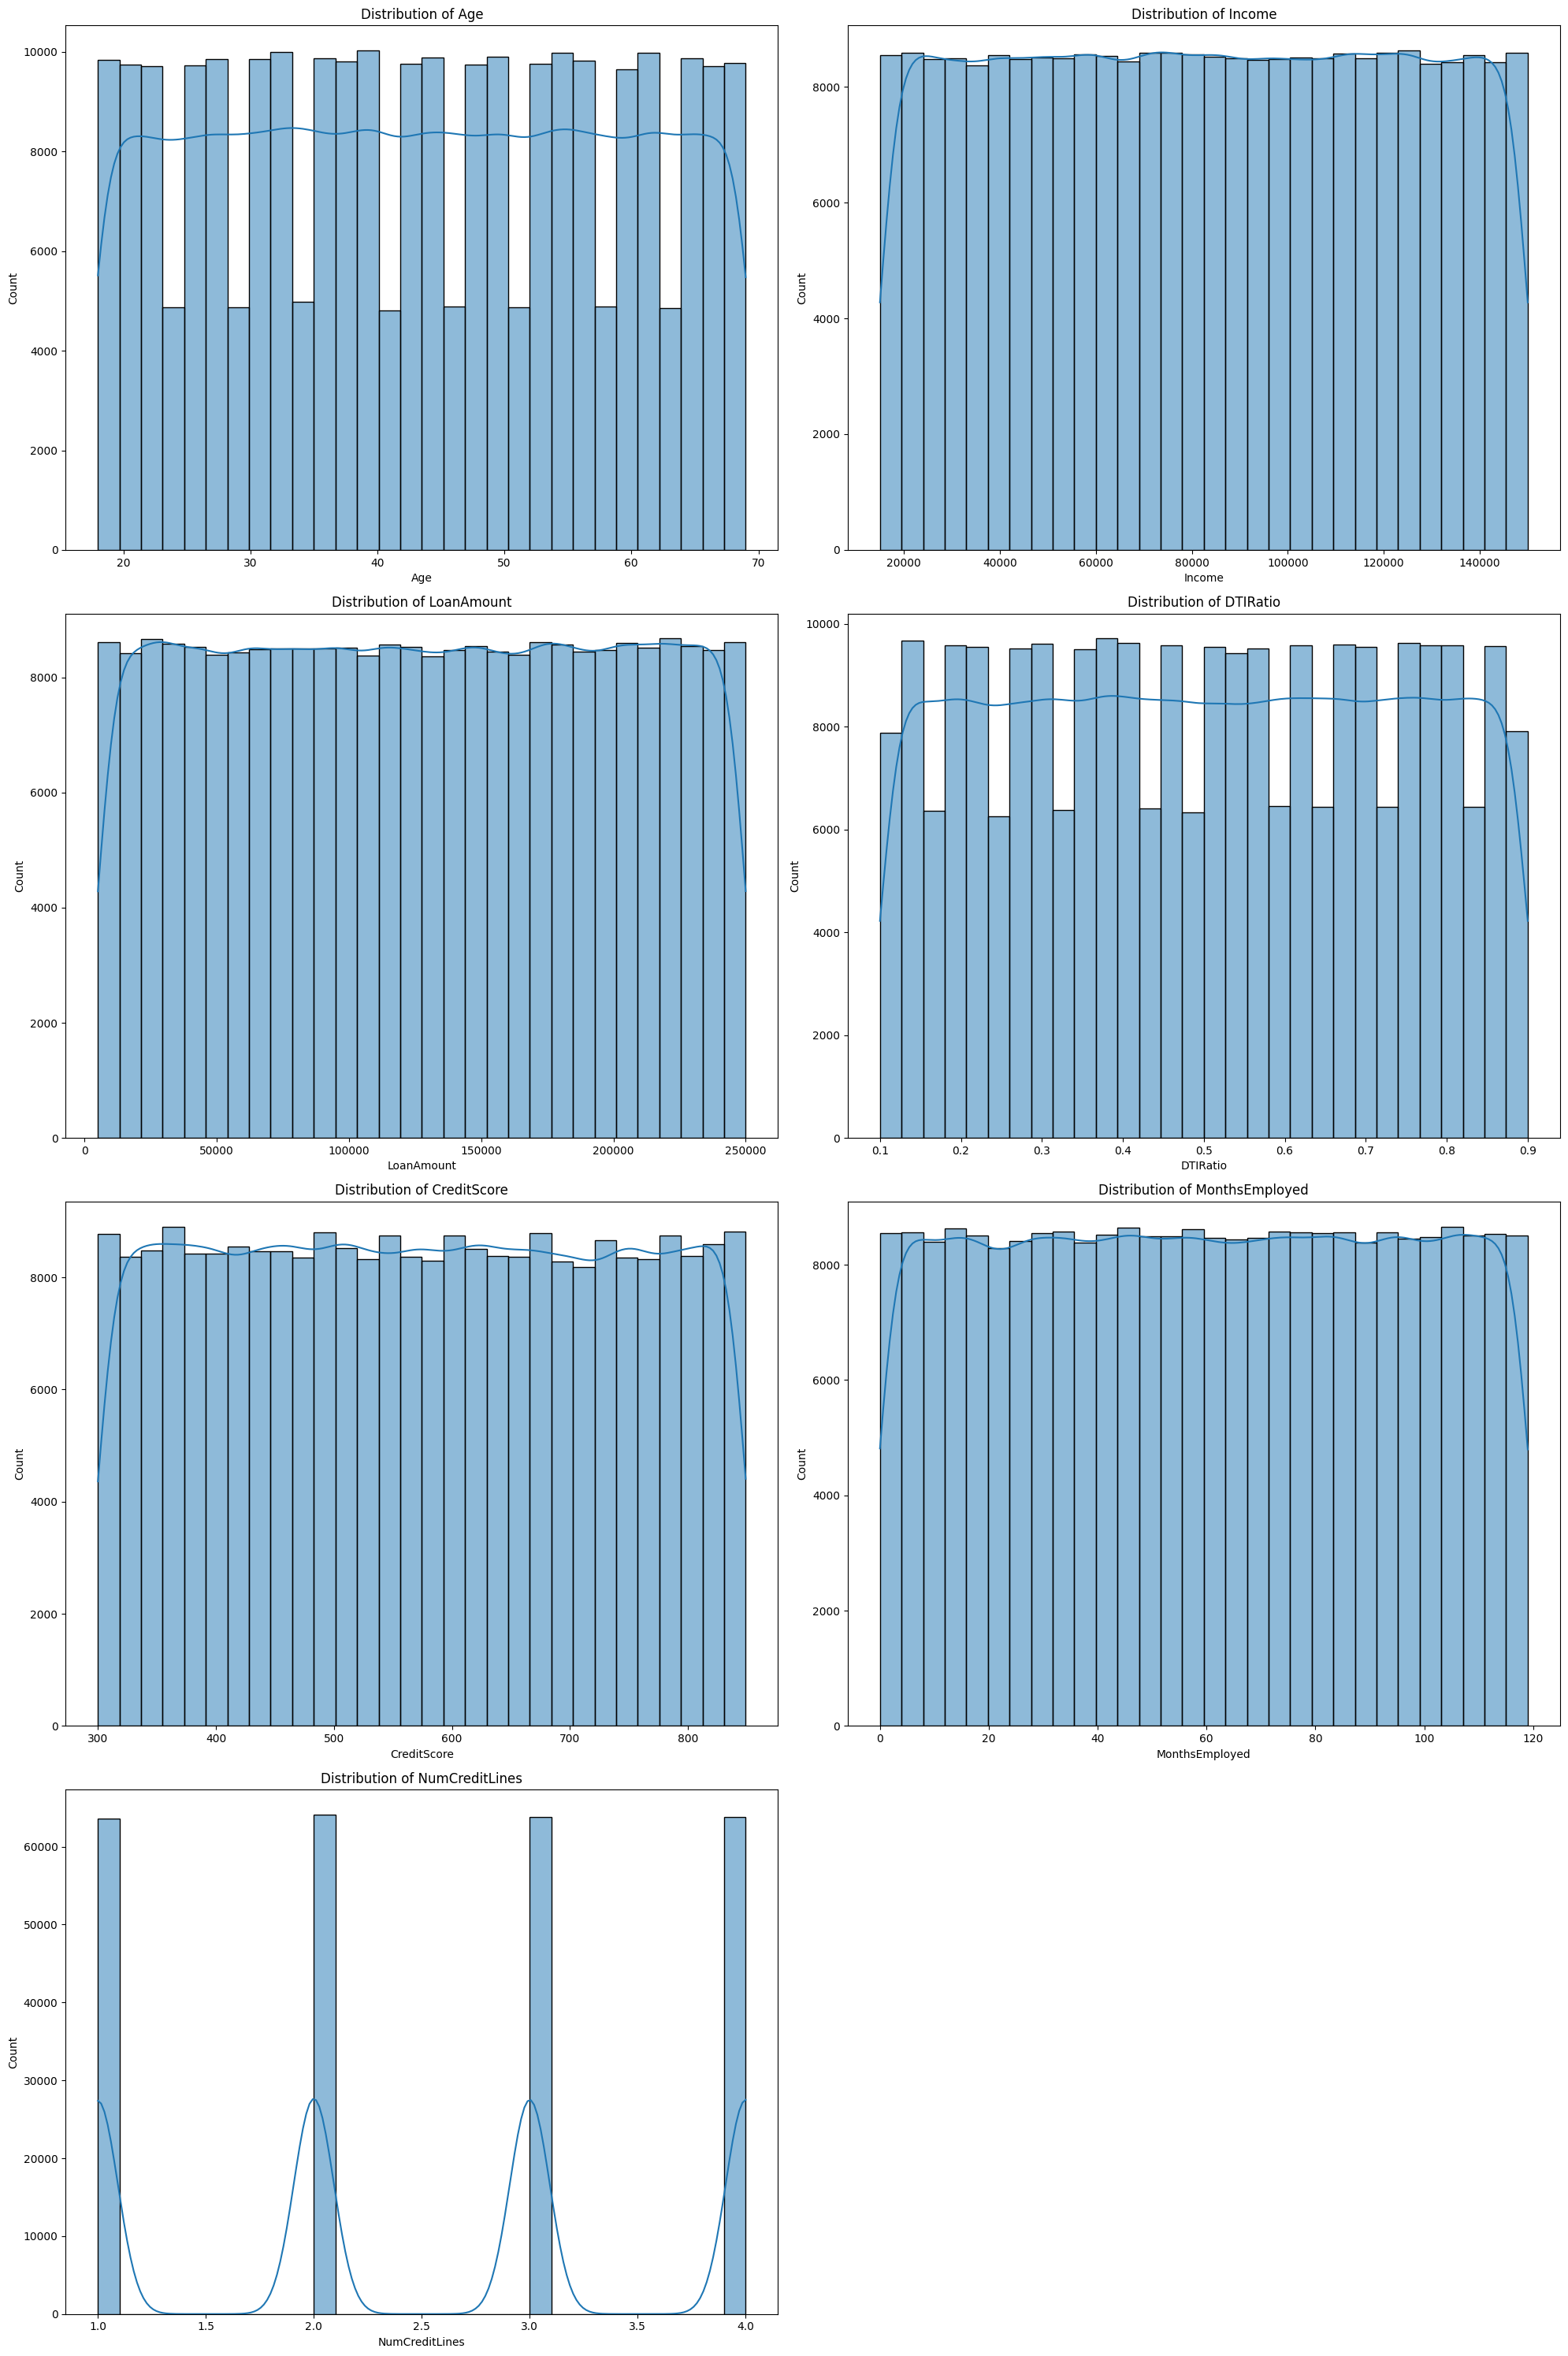

In [18]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\Dharmik\AppData\Local\Temp\ipykernel_10404\1553963320.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_default.index, y=edu_default.values, palette='viridis')


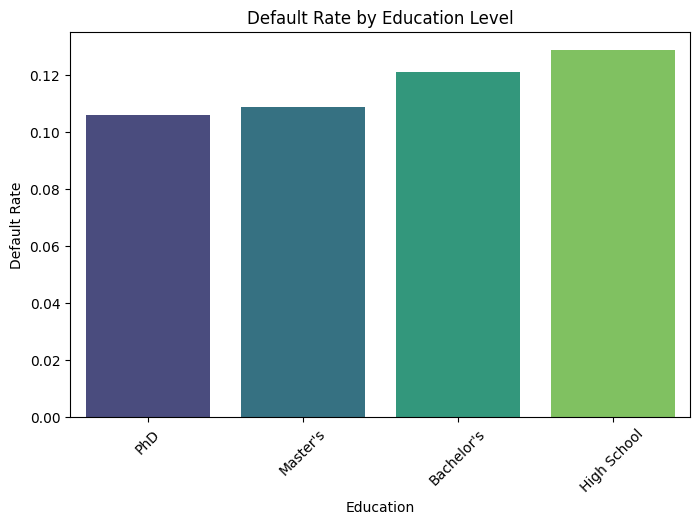

In [19]:
# Group by Education and calculate mean Default rate
edu_default = df.groupby('Education')['Default'].mean().sort_values()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=edu_default.index, y=edu_default.values, palette='viridis')
plt.ylabel('Default Rate')
plt.title('Default Rate by Education Level')
plt.xticks(rotation=45)
plt.show()


C:\Users\Dharmik\AppData\Local\Temp\ipykernel_10404\433890435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_loan.index, y=purpose_loan.values, palette='coolwarm')


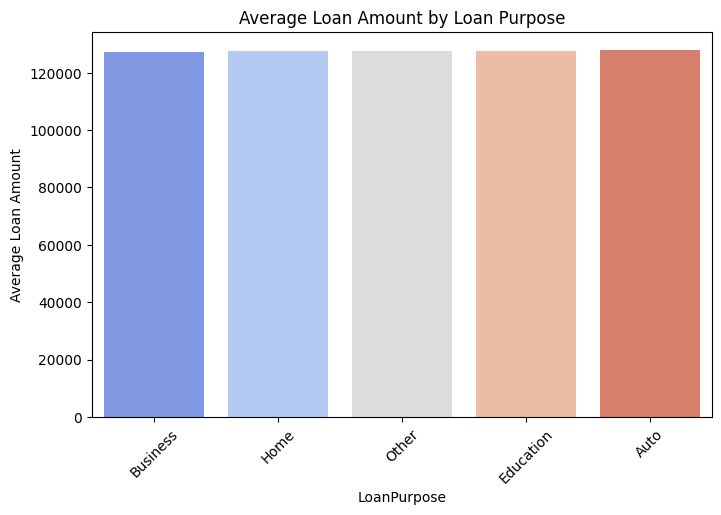

In [20]:
# Group by LoanPurpose and calculate mean LoanAmount
purpose_loan = df.groupby('LoanPurpose')['LoanAmount'].mean().sort_values()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=purpose_loan.index, y=purpose_loan.values, palette='coolwarm')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Loan Purpose')
plt.xticks(rotation=45)
plt.show()


C:\Users\Dharmik\AppData\Local\Temp\ipykernel_10404\3820564172.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emp_default.index, y=emp_default.values, palette='Set2')


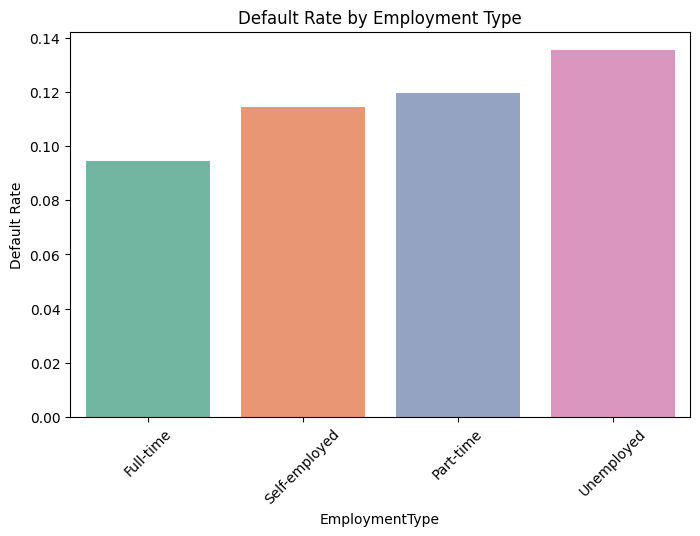

In [21]:
# Group by EmploymentType and calculate default rate
emp_default = df.groupby('EmploymentType')['Default'].mean().sort_values()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=emp_default.index, y=emp_default.values, palette='Set2')
plt.ylabel('Default Rate')
plt.title('Default Rate by Employment Type')
plt.xticks(rotation=45)
plt.show()


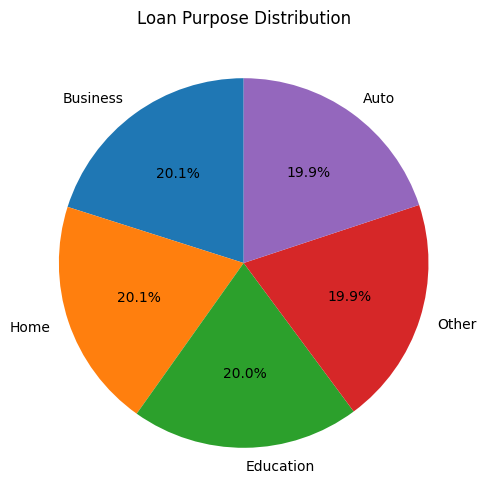

In [22]:
# Pie chart of loan purposes
plt.figure(figsize=(6, 6))
df['LoanPurpose'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Loan Purpose Distribution')
plt.ylabel('')
plt.show()


C:\Users\Dharmik\AppData\Local\Temp\ipykernel_10404\4102821898.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_credit = df.groupby('AgeCategory')['CreditScore'].mean()


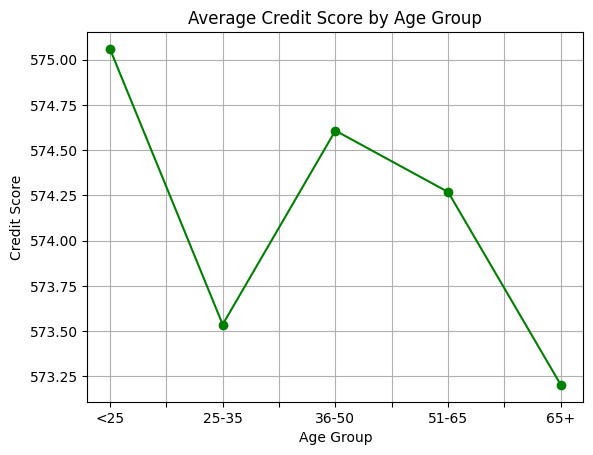

In [23]:
# Bin ages
age_bins = [0, 25, 35, 50, 65, 100]
age_labels = ['<25', '25-35', '36-50', '51-65', '65+']
df['AgeCategory'] = pd.cut(df['Age'],bins=age_bins,labels=age_labels)

# Average credit score by age group
age_credit = df.groupby('AgeCategory')['CreditScore'].mean()

# Plot
age_credit.plot(kind='line',marker='o',color='green')
plt.title('Average Credit Score by Age Group')
plt.ylabel('Credit Score')
plt.xlabel('Age Group')
plt.grid(True)
plt.show()


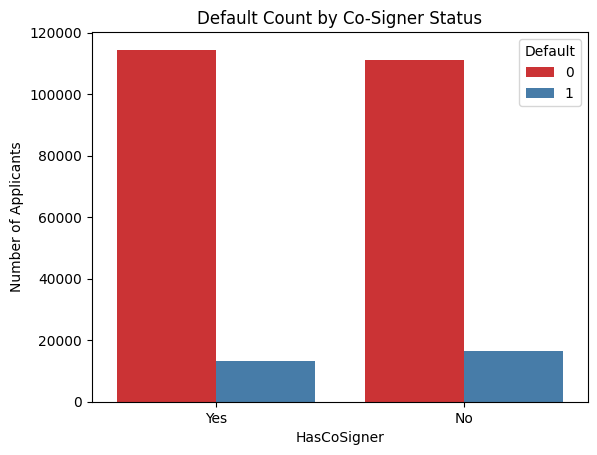

In [24]:
#CoSigner is another person for main applicant
sns.countplot(data=df, x='HasCoSigner',hue='Default',palette='Set1')
plt.title('Default Count by Co-Signer Status')
plt.ylabel('Number of Applicants')
plt.show()

In [25]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)


Column: Education
["Bachelor's" "Master's" 'High School' 'PhD']
----------------------------------------
Column: EmploymentType
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
----------------------------------------
Column: MaritalStatus
['Divorced' 'Married' 'Single']
----------------------------------------
Column: HasMortgage
['Yes' 'No']
----------------------------------------
Column: HasDependents
['Yes' 'No']
----------------------------------------
Column: LoanPurpose
['Other' 'Auto' 'Business' 'Home' 'Education']
----------------------------------------
Column: HasCoSigner
['Yes' 'No']
----------------------------------------


In [26]:
for col in ['HasMortgage', 'HasDependents', 'HasCoSigner']:
    df[col] = LabelEncoder().fit_transform(df[col])


In [27]:
employment_type_order={'Unemployed':0,'Self-employed':1,'Part-time':2,'Full-time':3}
df['EmploymentType']=df['EmploymentType'].map(employment_type_order)

we also assume employment type in order and use get dummies but did not increase the dimensions

In [29]:
MaritalStatus_order={'Divorced':0,'Married':1,'Single':2}
df['MaritalStatus']=df['MaritalStatus'].map(MaritalStatus_order)

In [30]:
education_order = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
df['Education'] = df['Education'].map(education_order)


In [31]:
df = pd.get_dummies(df, columns=['LoanPurpose'], drop_first=True)

in LoanPurpose we use get dummies because in this many cases and don't set normal numbers that the big numbers attention the model and ignore the small number

In [33]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default,AgeCategory,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,1,1,1,0,51-65,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,1,0,0,1,0,65+,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,0,1,1,0,1,36-50,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,1,0,0,0,0,25-35,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,0,1,0,0,51-65,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1,...,1,0,0,0,0,<25,False,False,False,True
255343,32,51953,189899,511,14,2,11.55,24,0.21,0,...,0,0,0,0,1,25-35,False,False,True,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,1,1,1,1,0,51-65,False,False,False,False
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,2,1,1,0,0,36-50,False,False,False,True


## Feature Engineering

In [35]:
#LoanIncome Ratio
df['LoanToIncomeRatio'] = df['LoanAmount'] / df['Income']
df['LoanToIncomeRatio'].head(3)

0    0.588262
1    2.467481
2    1.534154
Name: LoanToIncomeRatio, dtype: float64

In [36]:
df = pd.get_dummies(df, columns=['AgeCategory'], drop_first=True)

In [37]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanToIncomeRatio,AgeCategory_25-35,AgeCategory_36-50,AgeCategory_51-65,AgeCategory_65+
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,False,False,False,True,0.588262,False,False,True,False
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,0,False,False,False,True,2.467481,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,1,False,False,False,False,1.534154,False,True,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,True,False,False,False,1.412638,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,False,False,False,False,0.447179,False,False,True,False


In [38]:
df.dtypes

Age                        int64
Income                     int64
LoanAmount                 int64
CreditScore                int64
MonthsEmployed             int64
NumCreditLines             int64
InterestRate             float64
LoanTerm                   int64
DTIRatio                 float64
Education                  int64
EmploymentType             int64
MaritalStatus              int64
HasMortgage                int64
HasDependents              int64
HasCoSigner                int64
Default                    int64
LoanPurpose_Business        bool
LoanPurpose_Education       bool
LoanPurpose_Home            bool
LoanPurpose_Other           bool
LoanToIncomeRatio        float64
AgeCategory_25-35           bool
AgeCategory_36-50           bool
AgeCategory_51-65           bool
AgeCategory_65+             bool
dtype: object

<Axes: >

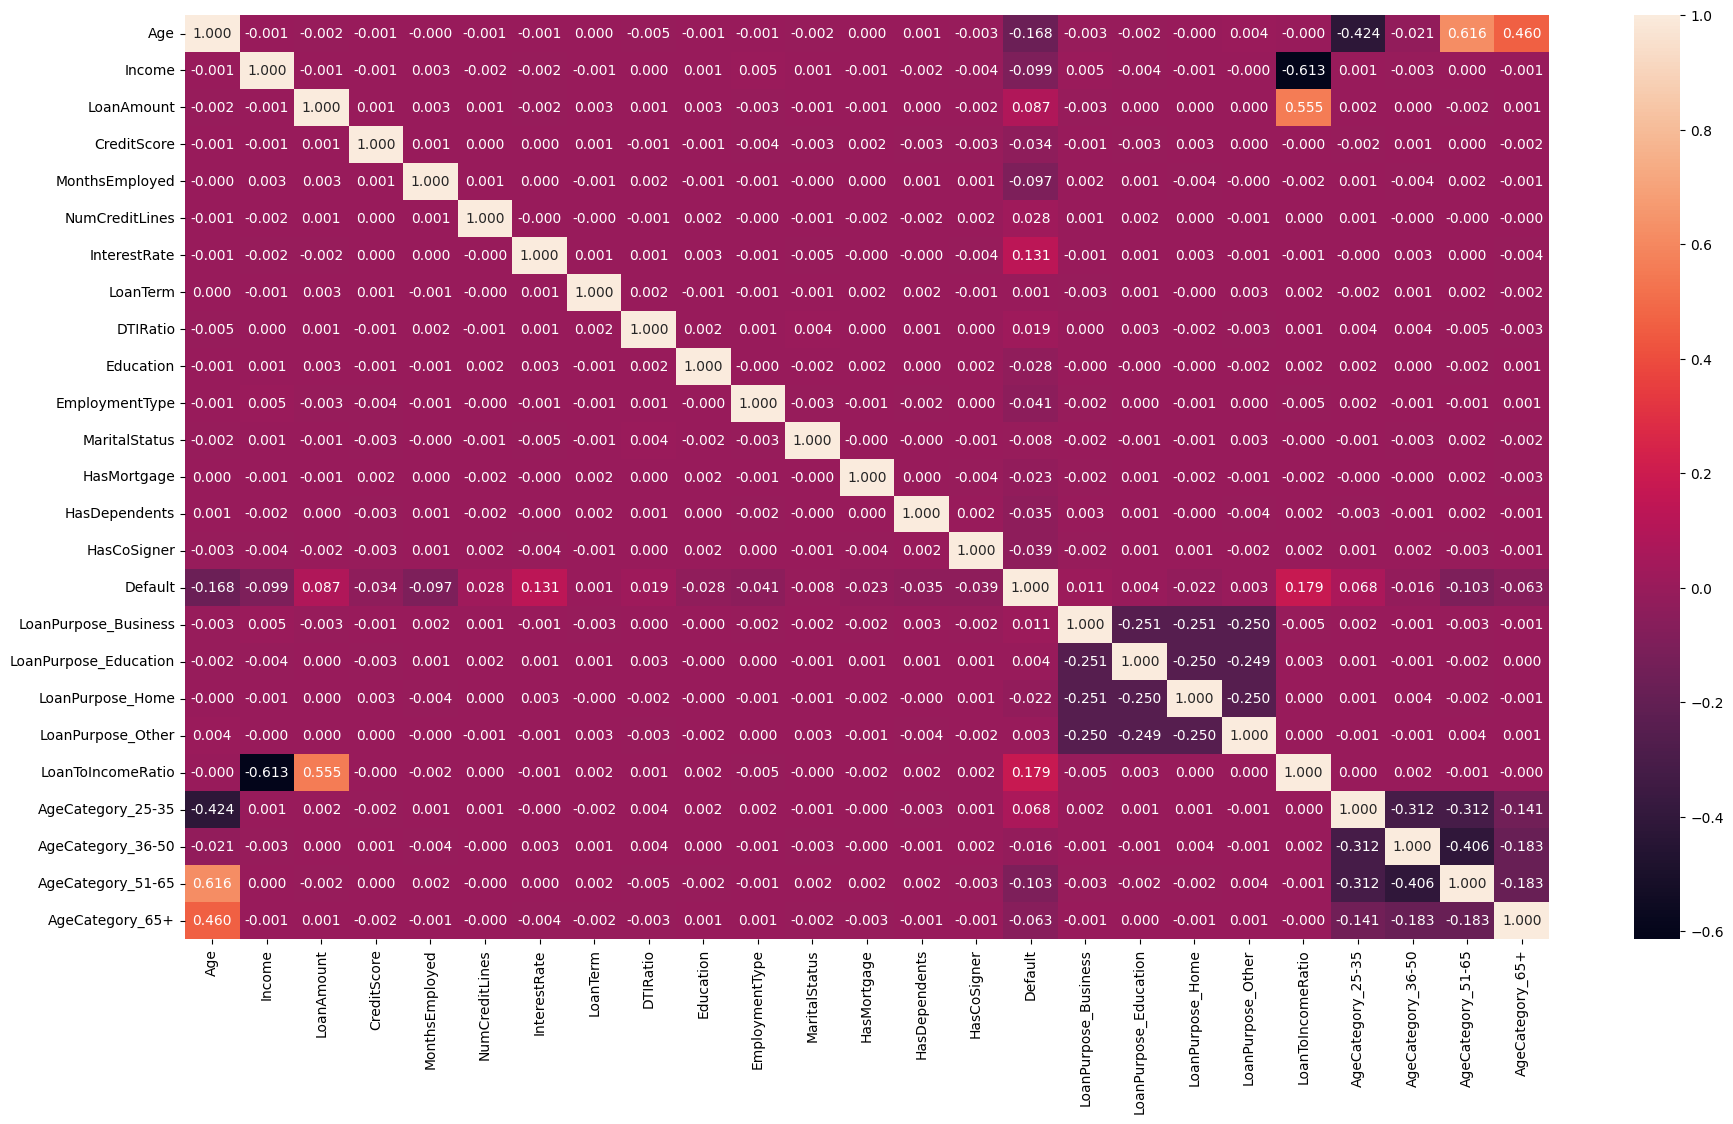

In [39]:
#heatmap after encoding
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,fmt='.3f')

Strong Correlations good candidates for interaction features

## Splitting

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(['Default'], axis=1)
y = df['Default']
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

## train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Handle Imbalance Data

In [46]:
from collections import Counter
from imblearn.combine import SMOTETomek

print("Before Resampling:", Counter(y_train))

# Apply SMOTE + Tomek Links on training set only
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

print("After Resampling:", Counter(y_train))

Before Resampling: Counter({0: 180524, 1: 23753})
After Resampling: Counter({0: 167176, 1: 167176})


## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model Selection

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     45170
           1       0.28      0.31      0.29      5900

    accuracy                           0.83     51070
   macro avg       0.59      0.60      0.60     51070
weighted avg       0.84      0.83      0.83     51070

Confusion Matrix:
 [[40336  4834]
 [ 4050  1850]]
ROC-AUC Score: 0.6963664236425107


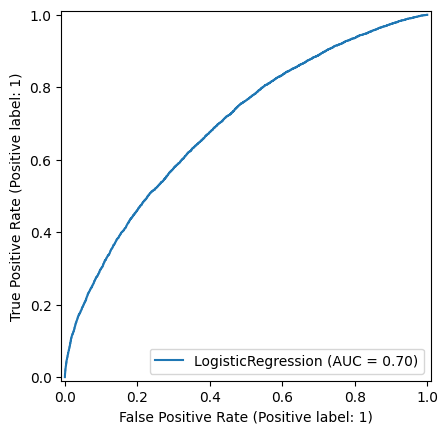

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

log_model = LogisticRegression(class_weight='balanced',max_iter=1000)
log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(log_model, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     45170
           1       0.33      0.19      0.24      5900

    accuracy                           0.86     51070
   macro avg       0.62      0.57      0.58     51070
weighted avg       0.83      0.86      0.85     51070

Confusion Matrix:
 [[42924  2246]
 [ 4781  1119]]
ROC-AUC Score: 0.7162826253363


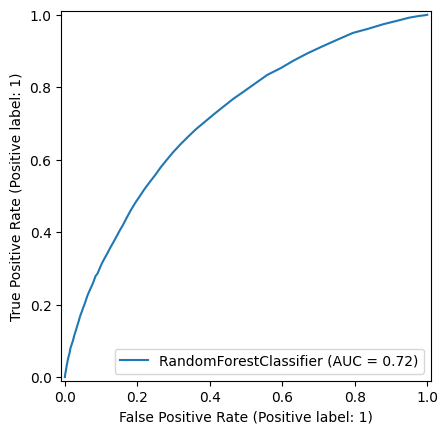

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)

In [52]:
rf_model.feature_importances_


array([0.11581472, 0.05124693, 0.04580296, 0.04412811, 0.05555204,
       0.02260957, 0.07270499, 0.05616391, 0.04241226, 0.03902846,
       0.05349704, 0.027374  , 0.03412727, 0.04973811, 0.05136934,
       0.01765818, 0.01668009, 0.01472072, 0.01642268, 0.06530265,
       0.04151525, 0.0335838 , 0.02642359, 0.00612334])

C:\Users\Dharmik\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:10:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93     45170
           1       0.44      0.14      0.22      5900

    accuracy                           0.88     51070
   macro avg       0.67      0.56      0.58     51070
weighted avg       0.84      0.88      0.85     51070

Confusion Matrix:
 [[44070  1100]
 [ 5051   849]]
ROC-AUC Score: 0.7369828632323089


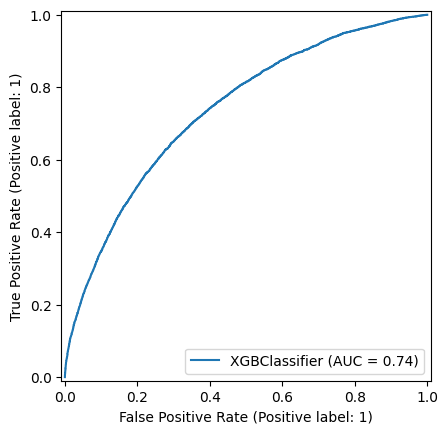

In [53]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_proba =xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)

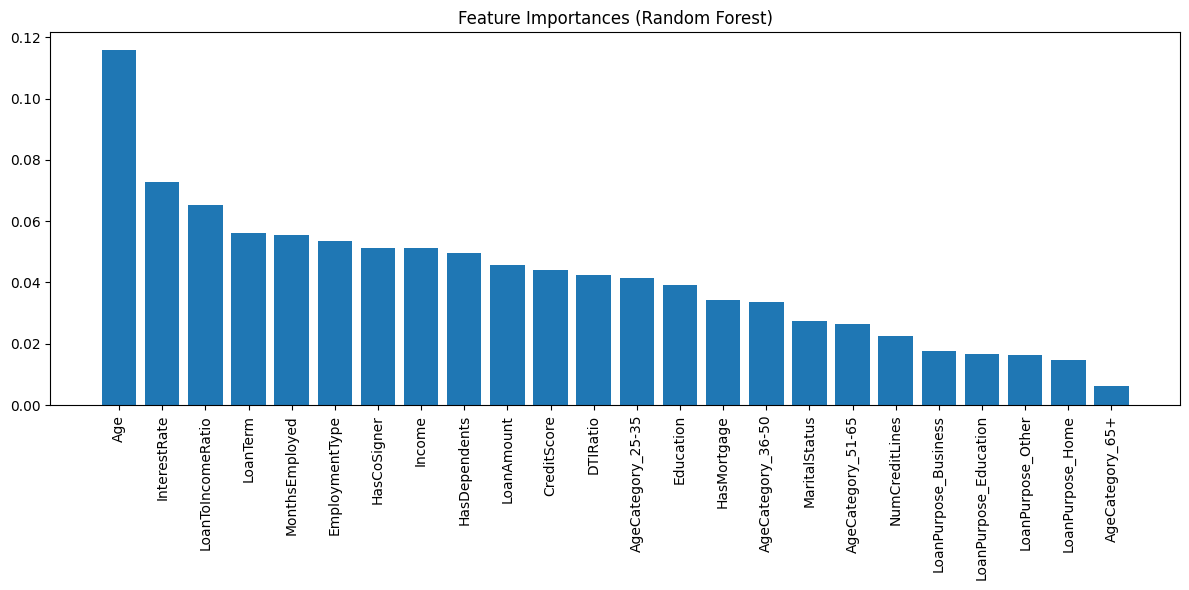

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming rf_model is already trained
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


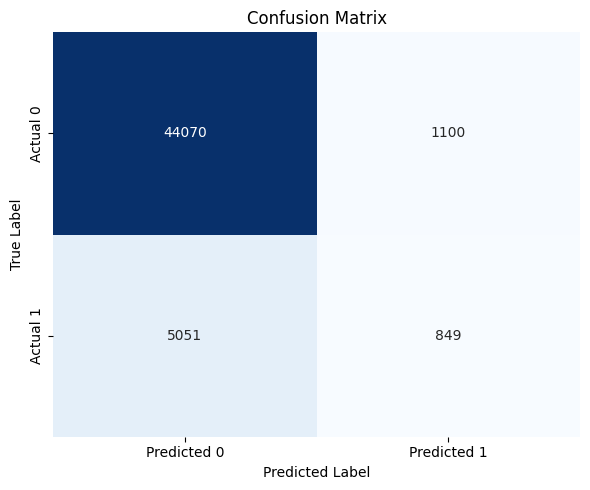

In [55]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [56]:
import joblib

# Save the model
joblib.dump(rf_model, "model_rf.pkl")

# Save the scaler
joblib.dump(sc, "scaler.pkl")

# Save column names
joblib.dump(df.columns.tolist(), "columns.pkl")



['columns.pkl']

In [63]:
import pandas as pd
import joblib

# -----------------
# 1. Load trained objects
# -----------------
rf_model = joblib.load("model_rf.pkl")
scaler = joblib.load("scaler.pkl")
columns = joblib.load("columns.pkl")  # list of all training columns

# -----------------
# 2. Function to preprocess and predict
# -----------------
def predict_single(data_dict):
    """
    data_dict: dictionary of raw feature values for a single sample.
    Keys must match the original column names before encoding.
    """
    # Convert to DataFrame
    new_data = pd.DataFrame([data_dict])

    # One-hot encode categorical features
    new_data = pd.get_dummies(new_data)

    # Remove 'Default' if accidentally provided
    if "Default" in new_data.columns:
        new_data = new_data.drop(columns=["Default"])

    # Add missing columns with 0
    for col in columns:
        if col != "Default" and col not in new_data.columns:
            new_data[col] = 0

    # Keep only training columns (except target), in correct order
    new_data = new_data[[col for col in columns if col != "Default"]]

    # Scale numeric features
    new_data_scaled = scaler.transform(new_data)

    # Predict
    prediction = rf_model.predict(new_data_scaled)[0]
    prediction_proba = rf_model.predict_proba(new_data_scaled)[0][1]

    return prediction, prediction_proba


# -----------------
# 3. Example usage
# -----------------
sample_input = {
    "Age": 56,
    "Income": 85994,
    "LoanAmount": 50587,
    "CreditScore": 520,
    "MonthsEmployed": 80,
    "NumCreditLines": 4,
    "InterestRate": 20.23,
    "LoanTerm": 36,
    "DTIRatio": 0.44,
    "Education": "Bachelor's",
    "EmploymentType": "Full-time",
    "MaritalStatus": "Divorced",
    "HasMortgage": "Yes",
    "HasDependents": "Yes",
    "LoanPurpose": "Other",
    "HasCoSigner": "Yes"
}

pred, proba = predict_single(sample_input)
print(f"Prediction: {pred} (0 = No Default, 1 = Default)")
print(f"Probability of Default: {proba:.2f}")


Prediction: 0 (0 = No Default, 1 = Default)
Probability of Default: 0.42
